# Проект: Статистический анализ данных

В данном проекте проводится анализ предоставленных данных популярного сервиса аренды самокатов **GoFast**. 

- Цель данного исследования:
    * **Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.**
- Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением Сервисом можно пользоваться: 
  * без подписки:
       * абонентская плата отсутствует;
       * стоимость одной минуты поездки — 8 рублей;
       * стоимость старта (начала поездки) — 50 рублей;
  * с подпиской Ultra:
       * абонентская плата — 199 рублей в месяц;
       * стоимость одной минуты поездки — 6 рублей;
       * стоимость старта — бесплатно.

## Описание данных
В основных данных есть информация о пользователях, их поездках и подписках.

- **Пользователи — users_go.csv**

    * user_id -	уникальный идентификатор пользователя

    * name - имя пользователя

    * age -	возраст

    * city -  город

    * subscription_type - тип подписки (free, ultra)



- **Поездки — rides_go.csv**

    * user_id - уникальный идентификатор пользователя

    * distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)

    * duration -	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

    * date -	дата совершения поездки



- **Подписки — subscriptions_go.csv**

    * subscription_type -	тип подписки

    * minute_price -	стоимость одной минуты поездки по данной подписке

    * start_ride_price -	стоимость начала поездки

    * subscription_fee -	стоимость ежемесячного платежа


### Импортируем необходимые библиотеки

In [ ]:
# !pip install -r requirements.txt
# при необходимости можно запустить данную команду и установятся версии библиотек,
# которые использовались в данном проекте и позволяли выполнить код без конфликтов

In [1]:
import pandas as pd
from scipy import stats as st
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
import seaborn as sns

###  Загрузка данных

In [2]:
#Прочитаем датасет и выведем первые 5 строк, а также информацию о датасете

try:
    users_go = pd.read_csv('/datasets/users_go.csv')
except:
    users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

print('Таблица users_go: \n\n', users_go.head(), '\n')

print(users_go.info())

Таблица users_go: 

    user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


In [3]:
print ('Количество явных дубликатов в `users_go.csv` = ', users_go.duplicated().sum())
print ('Количество пропусков в users_go.csv:','\n',users_go.isna().sum())

Количество явных дубликатов в `users_go.csv` =  31
Количество пропусков в users_go.csv: 
 user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


**Вывод** : users_go имеет 1565 записи, пропуски отсутствуют, количество явных дубликатов 31.

In [4]:
#Прочитаем датасет и выведем первые 5 строк, а также информацию о датасете
try:
    rides_go = pd.read_csv('/datasets/rides_go.csv')
except:
    rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
    
print('Таблица rides_go: \n\n', rides_go.head(), '\n')

print(rides_go.info())

Таблица rides_go: 

    user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


In [5]:
print ('Количество явных дубликатов в `rides_go.csv` = ', rides_go.duplicated().sum())
print ('Количество пропусков в rides_go.csv:','\n',rides_go.isna().sum())

Количество явных дубликатов в `rides_go.csv` =  0
Количество пропусков в rides_go.csv: 
 user_id     0
distance    0
duration    0
date        0
dtype: int64


**Вывод** : rides_go имеет 18068 записей, пропуски и явные дубликаты отсутствуют.

In [6]:
#Прочитаем датасет и выведем первые 5 строк, а также информацию о датасете
try:
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')
    
print('Таблица subscriptions_go: \n\n', subscriptions_go, '\n')

print(subscriptions_go.info())

Таблица subscriptions_go: 

   subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


In [7]:
print ('Количество пропусков в subscriptions_go.csv:','\n', subscriptions_go.isna().sum())

Количество пропусков в subscriptions_go.csv: 
 subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


**Вывод** : subscriptions_go имеет 2 записи, пропуски отсутствуют.

###  Предобработка данных

Все столбцы имеют названия в соответствии со змеиным регистром, поэтому смена названий не требуется.

В результате считывания датасетов выявлены явные дубликаты в датасете users_go и неверный тип данных в столбце "date" датасета rides_go, который был исправлен при прочтении датасета.

Поэтому на следующем этапе была поставлена задача избавиться от явных и неявных дубликатов и сменить тип данных там, где это необходимо.

In [8]:
rides_go.dtypes

user_id       int64
distance    float64
duration    float64
date         object
dtype: object

In [9]:
#rides_go['date'] = pd.to_datetime(rides_go['date'], format="%Y-%m-%d") #Смена типа данных столбца date

#rides_go.info() #Проверка смены данных

In [10]:
#Удаляем явные дубликаты в датасете users_go
users_go = users_go.drop_duplicates().reset_index(drop=True)
users_go.value_counts()

user_id  name       age  city            subscription_type
1        Кира       22   Тюмень          ultra                1
1020     Камилла    32   Москва          free                 1
1029     Игорь      21   Краснодар       free                 1
1028     Вадим      17   Сочи            free                 1
1027     Мария      21   Сочи            free                 1
                                                             ..
510      Роман      24   Ростов-на-Дону  ultra                1
509      Ян         29   Москва          ultra                1
508      Станислав  15   Тюмень          ultra                1
507      Эвелина    27   Пятигорск       ultra                1
1534     Альберт    25   Краснодар       free                 1
Length: 1534, dtype: int64

In [11]:
print('Количество явных дубликатов в `users_go.csv` = ', users_go.duplicated().sum())

Количество явных дубликатов в `users_go.csv` =  0


In [12]:
#Проверка неявных дубликатов в столбцах 'city' и 'name' 
set(users_go['city'].unique())

{'Екатеринбург',
 'Краснодар',
 'Москва',
 'Омск',
 'Пятигорск',
 'Ростов-на-Дону',
 'Сочи',
 'Тюмень'}

В столбце **'city'** неявные дубликаты отсутствуют

In [13]:
set(users_go['name'].unique())

{'Агата',
 'Аделина',
 'Адель',
 'Айдар',
 'Александр',
 'Александра',
 'Алексей',
 'Алина',
 'Алиса',
 'Алия',
 'Алла',
 'Альберт',
 'Альбина',
 'Алёна',
 'Амалия',
 'Амина',
 'Амир',
 'Анастасия',
 'Анатолий',
 'Ангелина',
 'Андрей',
 'Анжелика',
 'Анна',
 'Антон',
 'Антонина',
 'Ариана',
 'Арина',
 'Арсен',
 'Арсений',
 'Артемий',
 'Артур',
 'Артём',
 'Богдан',
 'Борис',
 'Вадим',
 'Валентина',
 'Валерий',
 'Валерия',
 'Варвара',
 'Василий',
 'Василина',
 'Василиса',
 'Вера',
 'Вероника',
 'Виктор',
 'Виктория',
 'Виолетта',
 'Виталий',
 'Виталина',
 'Влад',
 'Влада',
 'Владимир',
 'Владислав',
 'Владислава',
 'Всеволод',
 'Вячеслав',
 'Галина',
 'Георгий',
 'Герман',
 'Глеб',
 'Гордей',
 'Григорий',
 'Давид',
 'Дамир',
 'Даниил',
 'Данил',
 'Данила',
 'Даниэль',
 'Дарина',
 'Дарья',
 'Демид',
 'Денис',
 'Диана',
 'Дмитрий',
 'Ева',
 'Евгений',
 'Евгения',
 'Егор',
 'Екатерина',
 'Елена',
 'Елизавета',
 'Елисей',
 'Есения',
 'Жанна',
 'Зарина',
 'Захар',
 'Злата',
 'Иван',
 'Игнат',

В столбце **'name'** неявные дубликаты отсутствуют

In [14]:
#Проведём проверку аномальных значений в столбце 'age'
users_go.sort_values(by='age')

,user_id,name,age,city,subscription_type
664,665,Герман,12,Сочи,ultra
66,67,Анастасия,12,Ростов-на-Дону,ultra
727,728,Вячеслав,12,Пятигорск,free
34,35,Руслан,12,Пятигорск,ultra
235,236,Владимир,13,Тюмень,ultra
...,...,...,...,...,...
383,384,Виктор,38,Омск,ultra
804,805,Петр,38,Тюмень,free
453,454,Вероника,38,Краснодар,ultra
961,962,Дмитрий,39,Москва,free


В столбце **'age'** аномальные значения отсутствуют

In [15]:
#Проверим аномальные значения в столбце 'duration'
rides_go.sort_values(by='duration').head(10)

,user_id,distance,duration,date
12013,1102,4602.122401,0.5,2021-08-01
17314,1483,4445.481070,0.5,2021-03-06
15029,1318,5894.633314,0.5,2021-03-28
7437,766,4539.088310,0.5,2021-12-22
12967,1172,4907.140751,0.5,2021-12-19
15015,1317,4593.389022,0.5,2021-07-16
13012,1176,4935.071045,0.5,2021-05-14
7508,772,4718.820996,0.5,2021-05-22
16589,1428,5059.187375,0.5,2021-05-06
9049,890,4848.485014,0.5,2021-11-20


В датасете присутствуют значения 0.5, которые кажутся слишком маленькими для данного столбца. Возможно, они являются аномальными, а, возможно, люди могли передумать после начала поездки и завершить её раньше. Отбросим аномальные значения.

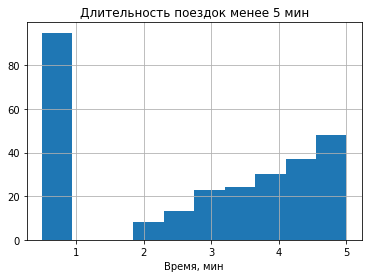

In [16]:
rides_min = rides_go.query('duration < 5')
rides_min['duration'].hist().set(title='Длительность поездок менее 5 мин',xlabel='Время, мин')
plt.show()

#### Добавим в датасет rides_go новый столбец с номером месяца.

In [17]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [18]:
rides_go['month_number'] = pd.DatetimeIndex(rides_go['date']).month
rides_go.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Вывод по предобработке данных:

В результате проведённой предобработки данных были обработаны 3 датасета, представленные компание GoFast: users_go, rides_go, subscriptions_go.

Данные были считаны и проверены на соответствие названий столбцов правилам хорошего стиля (змеиному регистру), на отсутствие пропусков, явных/неявных дубликатов, типа данных столбцов.

Все столбцы в перечисленных датасетах имеют верное, с точки зрения змеиного регистра, название.

Были проверены и удалены аномальные значения в датасетах.  

Пропуски во всех датасетах отсутствуют. 

- **users_go** имеются явные дубликаты, которые могли появиться в результате технической ошибки. Явные дубликаты были удалены. Была проведена проверка на наличие неявных дубликатов. ***(Если Владислав и Влад неявные дубликаты, то добавлю вывод об этом)***.


- **rides_go** в столбце 'date' датасета был изменён тип данных с 'object' на 'datetime64'.


- в датасете **subscriptions_go** изменений не проводилось.

А также на основании столбца 'date' был создан столбец 'month'

## Исследовательский анализ данных

### Определение частоты встречаемости городов.

In [19]:
city_frequency = users_go['city'].value_counts()
city_frequency

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

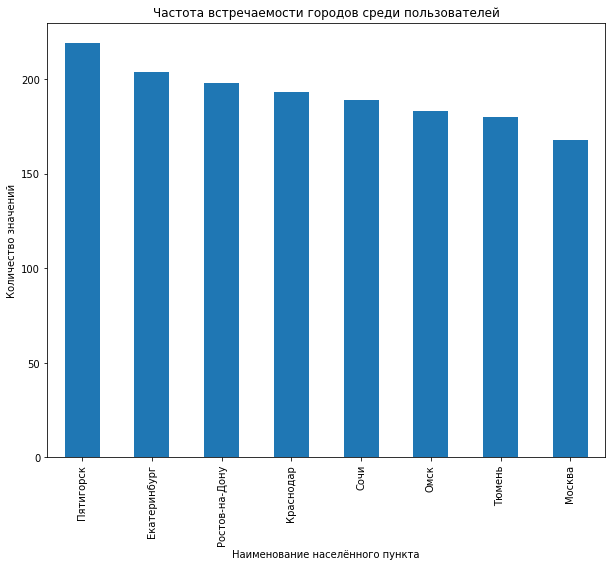

In [20]:
#Представим данные в виде гистограммы 
city_frequency.plot(
    kind = 'bar', 
    y = city_frequency,
    figsize=(10,8), 
    title = 'Частота встречаемости городов среди пользователей');
plt.xlabel('Наименование населённого пункта')
plt.ylabel('Количество значений');

#### Вывод:

Анализ городов показал, что наибольшим спросом сервис пользуется в городе Пятигорск, далее идут Екатеринбург, Ростов-на-Дону, Краснодар и т.д..Также можно отметить, что большая часть городов, в которых сервис особо пользуется спросом (за исключением Екатеринбурга), располагаются на юге, где как раз сезон проката в целом может быть дольше.

### Определение соотношения пользователей с подпиской и без подписки.

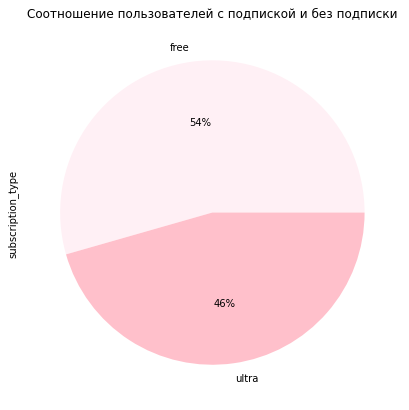

In [21]:
users_go['subscription_type'].value_counts().plot(kind='pie', y='subscription_type', autopct='%1.0f%%',
 colors = ['lavenderblush', 'pink'],
 figsize =(15,7),
 title='Соотношение пользователей с подпиской и без подписки');

In [22]:
users_go['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

#### Вывод:

Анализ количества пользователь с подпиской и без показал, что большинство пользователей (835 - 54%) пользуются сервисом без подписки.

### Анализ возраста пользователей.


In [23]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

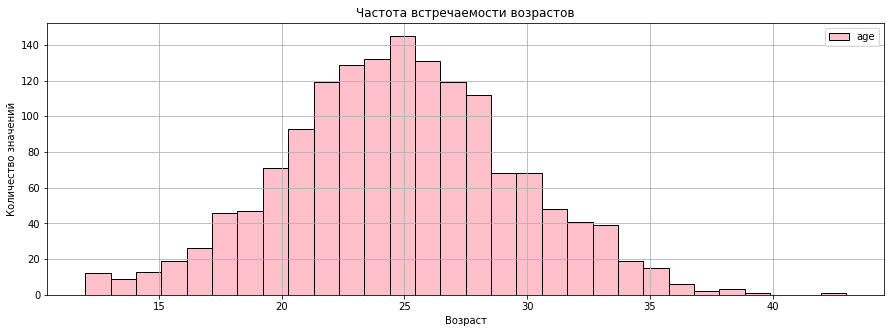

In [24]:
users_go['age'].hist(bins=30, figsize=(15, 5), color = 'pink', ec='black', legend=True)
plt.title('Частота встречаемости возрастов')
plt.xlabel('Возраст')
plt.ylabel('Количество значений')
plt.show()

#### Вывод:

Анализ возраста пользователей показал, что в целом возраст распределён более менее равномерно, выбросы отсутствуют. Средний возраст пользователей практически совпадает с медианой и соответствует возрасту 25 лет.

### Анализ расстояния, которое пользователь преодолел за одну поездку.

In [25]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [26]:
rides_go.query('distance < 50').sort_values(by='distance')

,user_id,distance,duration,date,month_number
11555,1069,0.855683,10.001902,2021-01-31,1
9541,925,2.570787,3.011018,2021-10-19,10
13690,1223,4.329506,4.008958,2021-05-22,5
8658,861,6.784447,6.015656,2021-07-21,7
7841,796,7.097072,10.026614,2021-11-26,11
8906,880,11.283615,2.035632,2021-03-28,3
8324,835,12.233115,4.034952,2021-09-19,9
13940,1240,15.000606,10.045002,2021-08-20,8
15626,1364,15.366168,6.057623,2021-08-22,8
11862,1091,15.630873,13.044660,2021-03-29,3


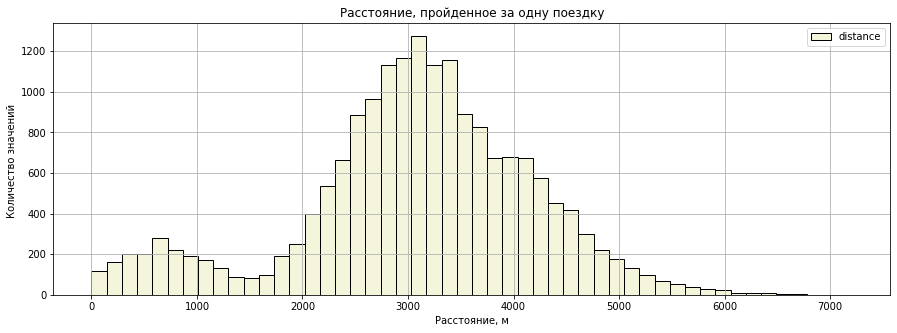

In [27]:
rides_go['distance'].hist(bins=50, figsize=(15, 5), color = 'beige', ec='black', legend=True)
plt.title('Расстояние, пройденное за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество значений ')
plt.show()

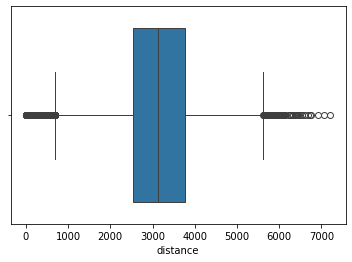

In [28]:
sns.boxplot(x=rides_go['distance'])
plt.show()

#### Вывод

Визуализация количества поездок в зависимости от расстояния указывает, медиана поездок находится на 3133 метров, среднее значение 3070 м.
В целом данные распределены равномерно. Но также тут необходимо учитывать, имеет ли пользователь подписку, потому что, возможно, люди, имеющие подписку, ездят на бОльшие расстояния. 

### Анализ продолжительности поездок.

In [29]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

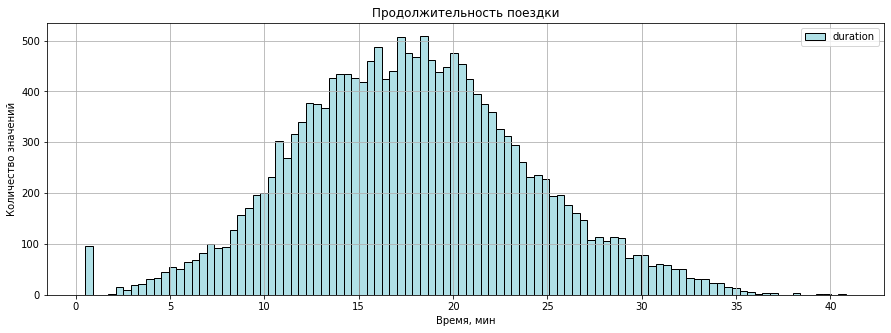

In [30]:
rides_go['duration'].hist(bins=100, figsize=(15, 5), color = 'powderblue', ec='black', legend=True)
plt.title('Продолжительность поездки')
plt.xlabel('Время, мин')
plt.ylabel('Количество значений')
plt.show()

In [31]:
rides_go.query('duration > 0.5')['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

#### Вывод

Визуализация количества поездок в зависимости от продолжительности указывает, медиана поездок находится на 17 мин, что совпадает со средним временем поездки. На гисторгамме замечено аномальное время поездок порядка 100 с временем менее 1 минуты.

### Вывод по исследовательскому анализу данных:

1) Можно сделать вывод, что сервис аренды самокатов больше всего пользуется спросом в городах, расположенных на юге: Пятигорск, Ростов-на-Дону, Краснодар, Сочи, однако второе место в топе занял Екатеринбург. 


2) Количество пользователей без подписки free 54% превышает количество пользователей с подпиской ultra 46%.

3) Анализ возраста показал, что средний возраст пользователей услуги подчиняется нормальному распределению с медианой примерно в 25 лет, при этом средний возраст и медиана практически совпадают.

4) Визуализация количества поездок в зависимости от расстояния указывает, медиана поездок находится на 3133 метров, среднее значение 3070 м. В целом данные распределены равномерно. Но также тут необходимо учитывать, имеет ли пользователь подписку, потому что, возможно, люди, имеющие подписку, ездят на бОльшие расстояния.

5) Визуализация количества поездок в зависимости от продолжительности указывает, медиана поездок находится на 17 мин, что совпадает со средним временем поездки. На гисторгамме замечено аномальное время поездок порядка 100 с временем менее 1 минуты.

## Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм. 

In [32]:
data = users_go.merge(rides_go, on='user_id', how='left').merge(subscriptions_go, on='subscription_type', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            18068 non-null  int64  
 1   name               18068 non-null  object 
 2   age                18068 non-null  int64  
 3   city               18068 non-null  object 
 4   subscription_type  18068 non-null  object 
 5   distance           18068 non-null  float64
 6   duration           18068 non-null  float64
 7   date               18068 non-null  object 
 8   month_number       18068 non-null  int64  
 9   minute_price       18068 non-null  int64  
 10  start_ride_price   18068 non-null  int64  
 11  subscription_fee   18068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.8+ MB


In [33]:
#Посчитаем пропущенные значения нового датафрейма, чтобы убедиться, что они не возникли в результате объединения
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month_number         0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

#### Вывод:

В результате был создан новый датафрейм, не имеющий пропусков, неверных типов данных.

### Создание датафрейма с данными о пользователях с подпиской.

In [34]:
data_sub_ultra = data.loc[data['subscription_type'] == 'ultra']
data_sub_ultra.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


### Создание датафрейма с данными о пользователях без подписки.

In [35]:
data_sub_free = data.loc[data['subscription_type'] == 'free']
data_sub_free.tail(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0
18067,1534,Альберт,25,Краснодар,free,2371.711192,15.893917,2021-12-29,12,8,50,0


### Проведение визуализации данных о продолжительности поездки и расстояния с целью сравнения пользователей с подпиской и без подписки. 

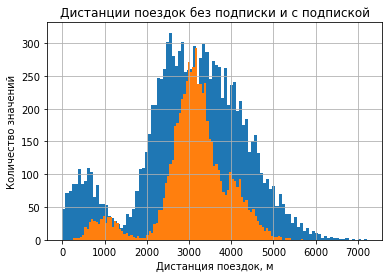

In [36]:
data_sub_free['distance'].hist(bins=100)
data_sub_ultra['distance'].hist(bins=100).set(title='Дистанции поездок без подписки и с подпиской')
plt.xlabel('Дистанция поездок, м')
plt.ylabel('Количество значений')
plt.show()

In [37]:
data_sub_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

In [38]:
data_sub_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

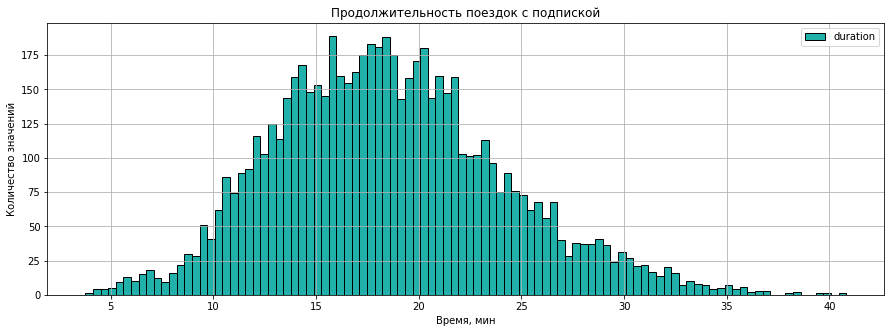

In [39]:
data_sub_ultra['duration'].hist(bins=100, figsize=(15, 5), color = 'lightseagreen', ec='black', legend=True)
plt.title('Продолжительность поездок с подпиской')
plt.xlabel('Время, мин')
plt.ylabel('Количество значений')
plt.show()

In [40]:
data_sub_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

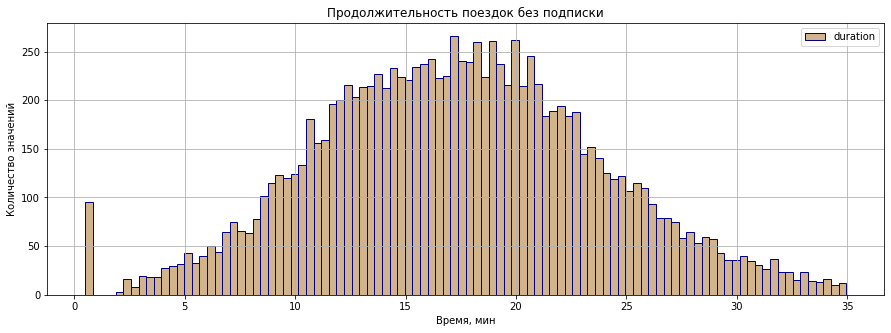

In [41]:
data_sub_free['duration'].hist(bins=100, figsize=(15, 5), color = 'tan', ec='navy', legend=True)
plt.title('Продолжительность поездок без подписки')
plt.xlabel('Время, мин')
plt.ylabel('Количество значений')
plt.show()

In [42]:
data_sub_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

### Вывод по визуализации данных о продолжительности поездки и расстояния с целью сравнения пользователей с подпиской и без подписки

Наличие подписки влияет на расстояние и продолжительность поездок, так как:

Визуализация данных показала, что с подпиской медианные значения дистанции поездки больше, чем без неё. А также при использовании подписки наблюдается меньший разброс данных. 

Визуализация данных о продолжителльности поездки показала, что подписка влияет на медианные значения (время поезки без подписки 18 мин с подпиской 19 мин), так же замечено снижение стандартного отклонения free - 6.33 ultra - 5.57.

Скорее всего это наблюдается, потому что с подпиской более выгодно использовать сервис, получается плата меньше, чем без неё, и люди без подписки, скорее всего, стараются проезжать меньше, чтобы вышло дешевле.

## Подсчёт выручки

### Создание датафрейма с агрегированными данными о поездках на основе датафрейма с объединёнными данными предыдущего этапа исследования. 

In [43]:
data['duration'] = np.ceil(data['duration'])

In [44]:
users_months_revenue = data.pivot_table(
    index=('user_id', 'month_number'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',})
)

users_months_revenue.columns = [
    'count', 'distance', 
    'duration', 
    'minute_price',
    'start_ride_price', 
    'subscription_fee'
]


users_months_revenue.head()

count     distance  duration  minute_price  \
user_id month_number                                               
1       1                 2  7027.511294      42.0             6   
        4                 1   754.159807       7.0             6   
        8                 2  6723.470560      46.0             6   
        10                2  5809.911100      32.0             6   
        11                3  7003.499363      56.0             6   

                      start_ride_price  subscription_fee  
user_id month_number                                      
1       1                            0               199  
        4                            0               199  
        8                            0               199  
        10                           0               199  
        11                           0               199

In [45]:
#Подсчет пропусков в датафрейме
users_months_revenue.isna().sum()

count               0
distance            0
duration            0
minute_price        0
start_ride_price    0
subscription_fee    0
dtype: int64

### Добавление столбца с помесячной выручкой ('revenue') для каждого пользователя сервиса.

In [46]:
users_months_revenue['revenue'] = (
users_months_revenue['start_ride_price']*users_months_revenue['count']+
users_months_revenue['minute_price']*users_months_revenue['duration']+
users_months_revenue['subscription_fee'])

print('Записи с ', data['date'].min(), 'по', data['date'].max())
print ('Выручка за 2021 год составила :',users_months_revenue['revenue'].sum(), 'руб.')

Записи с  2021-01-01 по 2021-12-30
Выручка за 2021 год составила : 3878641.0 руб.


In [47]:
users_months_revenue.head()

count     distance  duration  minute_price  \
user_id month_number                                               
1       1                 2  7027.511294      42.0             6   
        4                 1   754.159807       7.0             6   
        8                 2  6723.470560      46.0             6   
        10                2  5809.911100      32.0             6   
        11                3  7003.499363      56.0             6   

                      start_ride_price  subscription_fee  revenue  
user_id month_number                                               
1       1                            0               199    451.0  
        4                            0               199    241.0  
        8                            0               199    475.0  
        10                           0               199    391.0  
        11                           0               199    535.0

### Вывод: 

Суммарная выручка пользователей сервиса за год составила 3 878 641 руб.

## Проверка гипотез

### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Отталкиваясь от этих данных, мы проверим следующие гипотезы:

H0 (нулевая гипотеза): расстояние, которое пользователи с подпиской в среднем проезжают за одну поездку равно 3130 метров.

H1 (альтернативная гипотеза): пользователи с подпиской в среднем проезжают расстояние больше оптимального.

In [48]:
distance = 3130
alpha = 0.05

results = st.ttest_1samp(
    data_sub_ultra['distance'], 
    distance,
    alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


#### Вывод

На основании статистического анализа данных можно сделать вывод, что мы не смогли отвергнуть нулевую гипотезу, а значит, что среднее расстояние поездки, пользователей с подпиской, не превышает оптимальное расстоянием в 3130 метров с точки зрения износа самоката.

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
H0 (нулевая гипотеза): помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.

H1 (альтернативная гипотеза): помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [49]:
results = st.ttest_ind(
    users_months_revenue.loc[users_months_revenue['subscription_fee'] > 0, 'revenue'], 
    users_months_revenue.loc[users_months_revenue['subscription_fee'] == 0, 'revenue'], 
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


#### Вывод

Мы отвергли нулевую гипотезу, а значит, что пользователи с подиской ultra приносят месячную выручку больше, чем пользователи без подписки. 

### Ситуация:

Представим такую ситуацию:

*Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.*

Ответим на вопрос: "Какой тест понадобился бы для проверки этой гипотезы?

**Для проверки этой гипотезы нам понадобился бы тест scipy.stats.ttest_rel с проверкой левосторонней гипотезы alternative='less'.** 

## Распределения

### Распределение 1

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 

Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

При раздаче промокодов в количестве 1161 вероятность, не выполнить план меньше 5.0 %


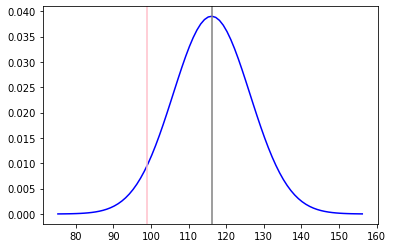

In [50]:
n = 1000
p = 0.1
k = 99
binom_cdf = 0.05

while binom_cdf < binom.cdf(k, n, p):
    n += 1
print(f'При раздаче промокодов в количестве {n} вероятность, не выполнить план меньше {binom.cdf(k, n, p).round(2)*100} %')

# зададим мат.ожидание и ст.отклонение нормального распределения равными мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)

plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.axvline(x=k, color='pink')
plt.axvline(x=mu, color='grey')
plt.show()

#### Вывод

Минимум 1161 промокод должен быть направлен потенциальным подписчикамНеобходимо довести до подписчиков как минимум 1161 промокода, для того чтобы как минимум 100 существующих клиентов продлили подписку (продлевают подписку 10% пролучивших промокод). 

### Распределение 2 

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность открытия сообщений: 0.15371708296369768


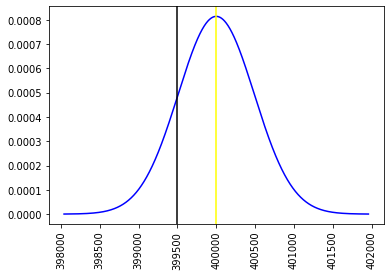

In [51]:
# параметры биномиального распределения
n = 1000000
p = 0.4
k = 399500
# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(k)
print('Вероятность открытия сообщений:', result)

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.xticks(rotation=90)
plt.axvline(x=k, color='black')
plt.axvline(x=mu, color='yellow')
plt.show()

#### Вывод

Если разослать 1 млн уведомлений с учётом, что открывают их только 40% от получивших, вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составит 15,37 %.

## Общий вывод исследования

В результате проведённой предобработки данных были обработаны 3 датасета, представленные компание GoFast: users_go, rides_go, subscriptions_go.

Данные были считаны и проверены на соответствие названий столбцов правилам хорошего стиля (змеиному регистру), на отсутствие пропусков, явных/неявных дубликатов, типа данных столбцов.

Все столбцы в перечисленных датасетах имеют верное, с точки зрения змеиного регистра, название.

Были проверены и удалены аномальные значения в датасетах.  

Пропуски во всех датасетах отсутствуют. 

- **users_go** имеются явные дубликаты, которые могли появиться в результате технической ошибки. Явные дубликаты были удалены. Была проведена проверка на наличие неявных дубликатов. ***(Если Владислав и Влад неявные дубликаты, то добавлю вывод об этом)***.


- **rides_go** в столбце 'date' датасета был изменён тип данных с 'object' на 'datetime64'.


- в датасете **subscriptions_go** изменений не проводилось.

А также на основании столбца 'date' был создан столбец 'month'

По исследовательскому анализу можно сделать вывод: 

1) Сервис аренды самокатов больше всего пользуется спросом в городах, расположенных на юге: Пятигорск, Ростов-на-Дону, Краснодар, Сочи, однако второе место в топе занял Екатеринбург.

2) Количество пользователей без подписки free 54% превышает количество пользователей с подпиской ultra 46%.

3) Анализ возраста показал, что средний возраст пользователей услуги подчиняется нормальному распределению с медианой примерно в 25 лет, при этом средний возраст и медиана практически совпадают.

4) Визуализация количества поездок в зависимости от расстояния указывает, медиана поездок находится на 3133 метров, среднее значение 3070 м. В целом данные распределены равномерно. Но также тут необходимо учитывать, имеет ли пользователь подписку, потому что, возможно, люди, имеющие подписку, ездят на бОльшие расстояния.

5) Визуализация количества поездок в зависимости от продолжительности указывает, медиана поездок находится на 17 мин, что совпадает со средним временем поездки. На гисторгамме замечено аномальное время поездок порядка 100 с временем менее 1 минуты.

Наличие подписки влияет на расстояние и продолжительность поездок, так как визуализация данных показала, что с подпиской медианные значения дистанции поездки больше, чем без неё. А также при использовании подписки наблюдается меньший разброс данных.

Визуализация данных о продолжителльности поездки показала, что подписка влияет на медианные значения (время поезки без подписки 18 мин с подпиской 19 мин), так же замечено снижение стандартного отклонения free - 6.33 ultra - 5.57.

Суммарная выручка пользователей сервиса за год составила 3 878 641 руб. - из них бОльшая часть приходится от пользователей, использующих подписку ultra - это показала проверка гипотез.
 
На основании статистического анализа данных (в частности проверки гипотез) можно сделать вывод, что мы отвергли нулевую гипотезу, которая предполагала, что время на поездки, затрачиваемое пользователями без подписки и с подпиской одинаково. Значит, пользователи, имеющие подписку, ездят более продолжительно и являются более выгодными для сервиса.

На основании статистического анализа данных можно сделать вывод, что мы не смогли отвергнуть нулевую гипотезу, а значит, что среднее расстояние поездки, пользователей с подпиской, не превышает оптимальное расстоянием в 3130 метров с точки зрения износа самоката.

Мы отвергли нулевую гипотезу о том, что пользователи без подписки приносят выручку больше, а это значит, что пользователи с подиской ultra приносят месячную выручку больше, чем пользователи без подписки.

Стоит отметить, что с подпиской более выгодно использовать сервис, получается плата меньше, чем без неё, и люди без подписки, скорее всего, стараются проезжать меньше, чтобы вышло дешевле. А также пользователи с подпиской являются более выгодными для сервиса GoFast, поэтому им стоит принять меры по продвижению подписки: донести ценность до клиентов, проводить акции, чтобы привлекать новых пользователей к использованию подписки и делать всё, чтобы пользователи, уже имеющие подписку, не приостанавливали её действие. 